Bayesian Statistics Seminar
===

Copyright 2017 Allen Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import math
import numpy as np

from thinkbayes2 import Pmf, Suite
import thinkplot

Working with Pmfs
---
Create a Pmf object to represent a six-sided die.

In [2]:
d6 = Pmf()

A Pmf is a map from possible outcomes to their probabilities.

In [3]:
for x in [1,2,3,4,5,6]:
    d6[x] = 1

Initially the probabilities don't add up to 1.

In [4]:
d6.Print()

1 1
2 1
3 1
4 1
5 1
6 1


`Normalize` adds up the probabilities and divides through.  The return value is the total probability before normalizing.

In [5]:
d6.Normalize()

6

Now the Pmf is normalized.

In [6]:
d6.Print()

1 0.166666666667
2 0.166666666667
3 0.166666666667
4 0.166666666667
5 0.166666666667
6 0.166666666667


And we can compute its mean (which only works if it's normalized).

In [7]:
d6.Mean()

3.5

`Random` chooses a random value from the Pmf.

In [8]:
d6.Random()

4

`thinkplot` provides methods for plotting Pmfs in a few different styles.

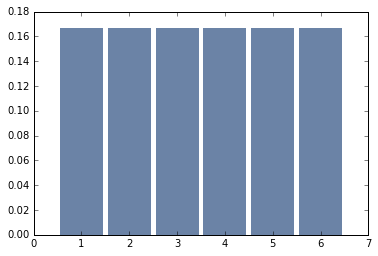

In [9]:
thinkplot.Hist(d6)

**Exercise 1:**  The Pmf object provides `__add__`, so you can use the `+` operator to compute the Pmf of the sum of two dice.

Compute and plot the Pmf of the sum of two 6-sided dice.

In [10]:
# Solution goes here

**Exercise 2:** Suppose I roll two dice and tell you the result is greater than 3.

Plot the Pmf of the remaining possible outcomes and compute its mean.

In [11]:
# Solution goes here

The cookie problem
---
Create a Pmf with two equally likely hypotheses.


In [12]:
cookie = Pmf(['Bowl 1', 'Bowl 2'])
cookie.Print()

Bowl 1 0.5
Bowl 2 0.5


Update each hypothesis with the likelihood of the data (a vanilla cookie).

In [13]:
cookie['Bowl 1'] *= 0.75
cookie['Bowl 2'] *= 0.5
cookie.Normalize()

0.625

Print the posterior probabilities.

In [14]:
cookie.Print()

Bowl 1 0.6
Bowl 2 0.4


**Exercise 3:** Suppose we put the first cookie back, stir, choose again from the same bowl, and get a chocolate cookie.

Hint: The posterior (after the first cookie) becomes the prior (before the second cookie).

In [15]:
# Solution goes here

**Exercise 4:** Instead of doing two updates, what if we collapse the two pieces of data into one update?

Re-initialize `Pmf` with two equally likely hypotheses and perform one update based on two pieces of data, a vanilla cookie and a chocolate cookie.

The result should be the same regardless of how many updates you do (or the order of updates).

In [16]:
# Solution goes here

## STOP HERE

## The Euro problem


**Exercise 5:**  Write a class definition for `Euro`, which extends `Suite` and defines a likelihood function that computes the probability of the data (heads or tails) for a given value of `x` (the probability of heads).

Note that `hypo` is in the range 0 to 100.  Here's an outline to get you started.

In [17]:
class Euro(Suite):
    
    def Likelihood(self, data, hypo):
        """ 
        hypo is the prob of heads (0-100)
        data is a string, either 'H' or 'T'
        """
        return 1

In [18]:
# Solution goes here

We'll start with a uniform distribution from 0 to 100.

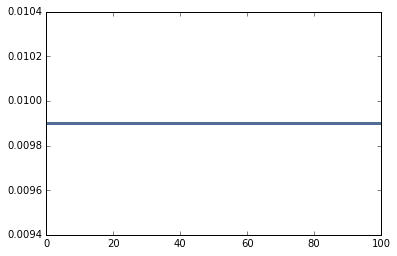

In [19]:
euro = Euro(range(101))
thinkplot.Pdf(euro)

Now we can update with a single heads:

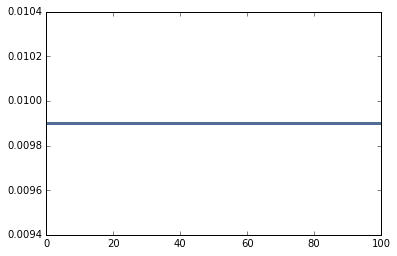

In [20]:
euro.Update('H')
thinkplot.Pdf(euro)

Another heads:

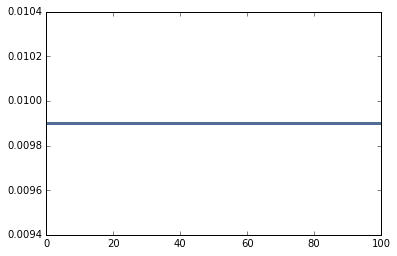

In [21]:
euro.Update('H')
thinkplot.Pdf(euro)

And a tails:

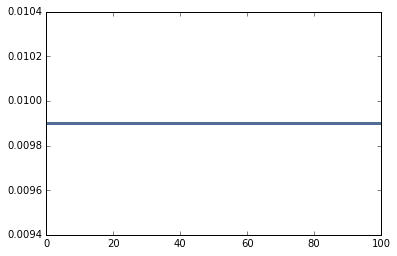

In [22]:
euro.Update('T')
thinkplot.Pdf(euro)

Starting over, here's what it looks like after 7 heads and 3 tails.

100

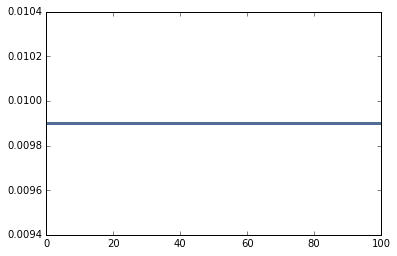

In [23]:
euro = Euro(range(101))

for outcome in 'HHHHHHHTTT':
    euro.Update(outcome)

thinkplot.Pdf(euro)
euro.MaximumLikelihood()

The maximum posterior probability is 70%, which is the observed proportion.

Here are the posterior probabilities after 140 heads and 110 tails.

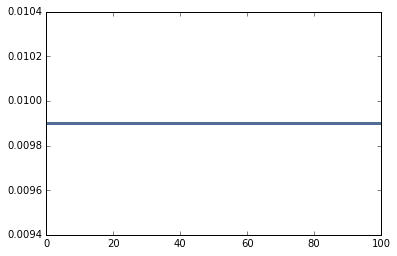

In [24]:
euro = Euro(range(101))

evidence = 'H' * 140 + 'T' * 110
for outcome in evidence:
    euro.Update(outcome)
    
thinkplot.Pdf(euro)

The posterior mean s about 56%

In [25]:
euro.Mean()

49.9999999999999

So is the value with maximum aposteriori probability (MAP).

In [26]:
euro.MAP()

100

The posterior credible interval has a 90% chance of containing the true value (provided that the prior distribution truly represents our background knowledge).

In [27]:
euro.CredibleInterval(90)

(5, 95)

**Exercise 6** The following function makes a `Euro` object with a triangle prior.

In [28]:
def TrianglePrior():
    """Makes a Suite with a triangular prior."""
    suite = Euro(label='triangle')
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    return suite

And here's what it looks like.

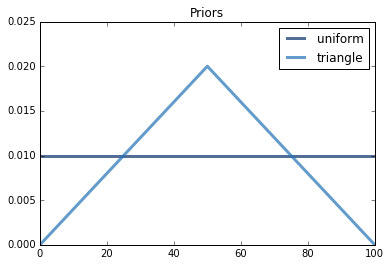

In [29]:
euro1 = Euro(range(101), label='uniform')
euro2 = TrianglePrior()
thinkplot.Pdfs([euro1, euro2])
thinkplot.Config(title='Priors')

Update `euro1` and `euro2` with the same data we used before (140 heads and 110 tails) and plot the posteriors.

In [30]:
# Solution goes here